In [1]:

import astropy
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import wcs
import astropy.wcs
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from astropy.coordinates import match_coordinates_sky
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import interpolate_replace_nans
from astropy.nddata.utils import Cutout2D
import matplotlib.pyplot as mpl
from matplotlib import cm
import matplotlib as mp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import astropy.units as u
from spectral_cube import SpectralCube
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import skimage.measure as measure
from skimage.draw import polygon2mask
import skimage as ski
plt.rcParams['text.usetex'] = True

In [2]:
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy

In [4]:
xray_updated = "Clavel_chandra_pigs-cube.fits"
xray_updated_hdu      = fits.open(xray_updated)[0]
xray_updated_wcs = WCS(xray_updated_hdu.header)
wcs_xray_2axis=xray_updated_wcs.dropaxis(2)


In [3]:
#smoothing Xray data
kernel   = Gaussian2DKernel(3) #originally set to 10
# Mask NaNs
xray_updated_hdu.data[np.isnan(xray_updated_hdu.data)] = 0
# Smooth each slice in turn
for i in range(0, len(xray_updated_hdu.data)):
    xray_updated_hdu.data[i] = convolve(xray_updated_hdu.data[i], kernel)
#Save new FITS file containing each smoothed slice
fits.writeto("Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits", xray_updated_hdu.data, xray_updated_hdu.header, overwrite=True)

In [5]:
x3_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits"
x3_hdu      = fits.open(x3_filename)[0]
x3_wcs = WCS(x3_hdu.header)

x2_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_2k_updated.fits"
x2_hdu      = fits.open(x2_filename)[0]
x2_wcs = WCS(x2_hdu.header)

x4_filename = 'Xray_Clavel_chandra_pigs-cube_smoothed_4k.fits'
x4_hdu      = fits.open(x4_filename)[0]
x4_wcs = WCS(x4_hdu.header)



In [6]:
#drop third axis of data cubes
wcs_2xray_2axis=x2_wcs.dropaxis(2)
wcs_3xray_2axis=x3_wcs.dropaxis(2)
wcs_4xray_2axis=x4_wcs.dropaxis(2)

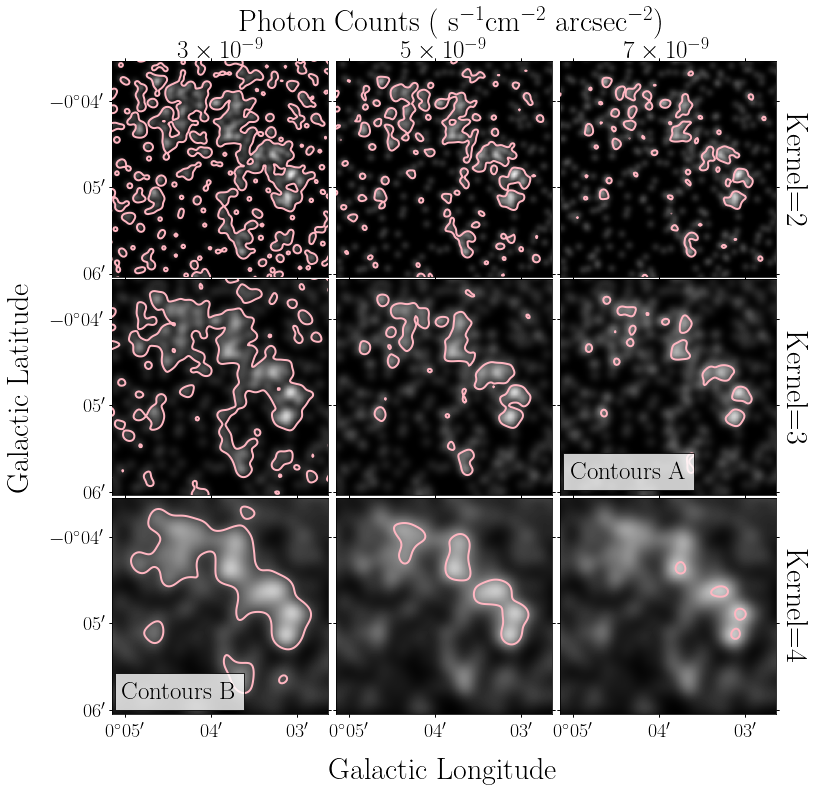

In [98]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

mpl.rcParams['mathtext.fontset'] = "cm" 
mpl.rcParams['font.family'] = "georgia" 
row = 3
col = 3
xray_start = 11
fig_smooth = plt.figure(figsize=(12, 12))
fig_smooth.subplots_adjust(wspace=0.01, hspace=0.01)
label_row = ['Kernel=2', 'Kernel=3', 'Kernel=4']
level = [3e-9, 5e-9, 7e-9]
titles = [r'$3 \times 10^{-9}$', r'$5 \times 10^{-9}$', r'$7 \times 10^{-9}$']
counter = 0

for i in range(row):
    for j in range(col):
        
        coord = plt.subplot(row, col, counter + 1, projection=wcs_2xray_2axis, slices=('x', 'y'))
        lon = coord.coords[0]
        lat = coord.coords[1]
        
        if i == 0:
            plt.imshow(x2_hdu.data[xray_start], cmap='gray')
            coord.contour(x2_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)
            coord.set_title(titles[j], size=25)

        if i == 1:
            plt.imshow(x3_hdu.data[xray_start], cmap='gray')
            coord.contour(x3_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)

        if i == 2:
            plt.imshow(x4_hdu.data[xray_start], cmap='gray')
            coord.contour(x4_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)
        if i==2 and j==1:
            coord.set_xlabel('Galactic Longitude', fontsize=30)
        elif counter >= ((col * row) - col):   
            lon.set_axislabel('')
            lon.set_ticklabel(size=20)
            lon.set_axislabel(' ') 
        else:
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')


        if counter % col == 0 and i==1 and j==0:
            coord.set_ylabel('Galactic Latitude', fontsize=30)
        elif counter % col == 0:
            lat.set_axislabel('')
            lat.set_ticklabel(size=20)
            lat.set_axislabel(' ')
        else:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

        lon.set_ticklabel(size=20)
        lat.set_ticklabel(size=20)
        counter += 1

        if j == 2:
            title = coord.set_title(str(label_row[i]), loc="right", y=.5, rotation=270, ha="left", va="center", size=30)
            offset_trans = mpl.transforms.ScaledTranslation(
                mpl.rcParams["axes.titlepad"] / 72, 0, coord.figure.dpi_scale_trans)
            title.set_transform(coord.transAxes + offset_trans)
        plt.xlim(150,300)
        plt.ylim(0,150)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
coord.text(-.5, 3.2, 'Photon Counts ('+r" $\rm s^{-1} cm^{-2}$" + r" $\rm arcsec^{-2}$"+')', ha='center', va='center', transform=coord.transAxes, fontsize=30)
coord.text(-1.76, .1, 'Contours B', ha='center', va='center', color='k',transform=coord.transAxes, fontsize=25,fontweight='bold',bbox=dict(boxstyle="square", facecolor="white",alpha=.8))
coord.text(.32, 1.12, 'Contours A', ha='center', va='center', color='k',transform=coord.transAxes, fontsize=25,fontweight='bold',bbox=dict(boxstyle="square", facecolor="white",alpha=0.8))
#plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.0)
plt.show()

In [14]:
x4_hdu.data[0].shape

(17, 130, 164)

In [99]:
fig_smooth.savefig('smoothing_contours_stone.pdf',bbox_inches='tight')

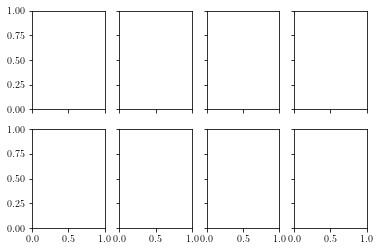

In [7]:
fig_xray, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)


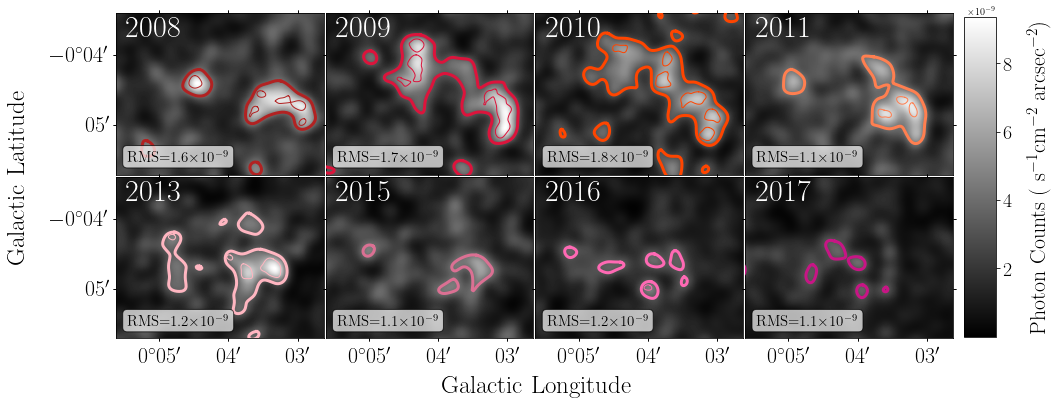

In [26]:
fig_xray = plt.figure(figsize=(15, 6))
#fig_xray.subplots_adjust(wspace=0.1, hspace=0.1)
row=2
col=4
xray_start=9
xray_year=1999+xray_start
count=0
rms=[r'1.6$\times$10$^{-9}$',r'1.7$\times$10$^{-9}$',r'1.8$\times$10$^{-9}$',r'1.1$\times$10$^{-9}$',r'1.2$\times$10$^{-9}$',r'1.1$\times$10$^{-9}$',r'1.2$\times$10$^{-9}$',r'1.1$\times$10$^{-9}$']
mpl.rcParams['font.family'] = "georgia" 
colors=['firebrick', 'crimson', 'orangered', 'coral', 'lightpink', 'palevioletred', 'hotpink', 'mediumvioletred']

for i in range(row * col):
    coord = plt.subplot(row, col, i + 1, projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]

    plt.imshow(x4_hdu.data[xray_start + i],cmap='gray')
    #coord.contour(x4_hdu.data[xray_start + i], colors=colors[i], linewidths=3, transform=coord.get_transform(wcs_4xray_2axis), levels=[3e-9])
   # coord.contour(x3_hdu.data[xray_start + i], colors=colors[i], linewidths=1, transform=coord.get_transform(wcs_3xray_2axis), levels=[7e-9])
    #coord.text(0.40, 0.85, str(round(xray_year, 1)), fontsize=25, transform=coord.transAxes,color="white")# bbox=dict(facecolor='white', alpha=0.9)
    c2_k4_17 = measure.find_contours(x4_hdu.data[xray_start+i], 3e-9)
    for j in c2_k4_17:
        if max(j[:,1])-min(j[:,1])>2:     #giving it a minimum width
                coord.plot(j[:, 1], j[:, 0], linewidth=3, color=colors[i],transform=coord.get_transform(wcs_4xray_2axis))
    c2_k3_17 = measure.find_contours(x3_hdu.data[xray_start+i], 7e-9)
    for j in c2_k3_17:
        if j[0,1]>150 and max(j[:,1])-min(j[:,1])>5:     #giving it a minimum width
                coord.plot(j[:, 1], j[:, 0], linewidth=1, color=colors[i],transform=coord.get_transform(wcs_3xray_2axis)) 
    coord.text(0.05, 0.85, str(round(xray_year, 1)), fontsize=30, transform=coord.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    

    if (xray_year) == 2011 or (xray_year) == 2013:
        xray_year += 2
    else:
        xray_year += 1
    if i >= ((col * row) - col):
        lon.set_axislabel('')
        coord.set_xlabel(' ', fontsize=28)
    else:
        lat.set_axislabel('')
        lon.set_axislabel('')

    if i % col == 0:
        lat.set_axislabel('')
        coord.set_ylabel(' ', fontsize=28)
    else:
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')
    lon.set_ticklabel(size=22)
    lat.set_major_formatter('dd:mm')
    lon.set_major_formatter('dd:mm')
    lat.set_ticklabel(size=22)
    plt.xlim(120,300)
    plt.ylim(20,160)
    coord.text(0.3, 0.11, 'RMS='+rms[i], ha='center', va='center', transform=coord.transAxes,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='k', alpha=0.7), fontsize=15)

coord.text(-1, -.3 ,'Galactic Longitude', ha='center', va='center', transform=coord.transAxes, fontsize=25)
coord.text(-3.5, 1.0 ,'Galactic Latitude', ha='center', va='center', rotation=90,transform=coord.transAxes, fontsize=25)
fig_xray.subplots_adjust(wspace=0.01, hspace=0.01)
cbar_ax = fig_xray.add_axes([.91, 0.13, 0.03, 0.74])

for ax in axes.flat:
    im = ax.imshow(x4_hdu.data[xray_start + i],cmap='gray')
cbar=fig_xray.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label= r'Photon Counts ('+r" $\rm s^{-1} cm^{-2}$" + r" $\rm arcsec^{-2}$"+')',size=22,labelpad=15)

plt.show()


In [24]:
fig_xray.savefig('xray_smoothed_contours.pdf',bbox_inches='tight',dpi=300)